In [1]:
from models import KNN, DecisionTree, preprocessing, RandomForest
from models.utils import strategies
import pandas as pd
from models.metrics import Metric, Average
from models.model_selection import PlotType, plot, heatmaps, train_test_split, evaluate, evaluate_by_class\
    , grid_search_cv
from typing import get_args
from pprint import pprint
import seaborn as sns

sns.set_theme(style="whitegrid")

# load data

In [2]:
# Load data
data = pd.read_csv('../data/Dataset1.csv')
data

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,0.8428,1
881,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,1.8404,2
882,264,10.3,475,7.49,0.74,0.88,10.56,0.45,7.36,1.87,10.63,0.63,1.5136,0
883,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0


In [3]:
data.describe()

,N,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
count,885.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,885.000000
mean,246.997740,501.338983,7.511955,0.543921,0.617817,7.545808,0.468723,4.126757,0.952002,8.653616,0.593424,1.063718,0.592090
std,77.359316,129.104610,0.464577,0.141324,0.841123,4.418087,1.888892,3.108088,0.465527,4.300963,0.574736,1.446265,0.578405
min,6.000000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.172000,0.000000
25%,201.000000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.210000,0.270000,0.653600,0.000000
50%,257.000000,475.000000,7.500000,0.550000,0.590000,6.640000,0.360000,3.560000,0.930000,8.340000,0.410000,1.014800,1.000000
75%,307.000000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.470000,0.610000,1.341600,1.000000
max,383.000000,1560.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,41.280000,2.000000


# Data preprocessing

In [4]:
target = 'Fertility'

In [5]:
X, Y = preprocessing.treat_data(data, target_column=target, normalization='z-score')
X

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM
0,-1.551804,-0.091098,0.521393,-0.066513,0.535760,0.366969,-0.322992,-1.155578,-1.437858,-0.389002,0.066270,-1.616350,0.366969
1,-0.514221,-0.466324,-1.354331,0.682937,1.459280,1.579355,0.361963,-0.651246,-1.227329,1.281175,-1.424239,0.926065,1.579355
2,-1.205943,0.250017,1.856369,0.542415,-0.245679,1.747741,0.050446,-0.651246,-1.227329,1.346247,-1.472898,0.926065,1.747741
3,-1.288950,-0.705105,-0.196789,0.776619,0.251601,1.175226,0.361963,-0.315025,-1.349819,1.259485,-1.485703,0.926065,1.175226
4,0.274342,0.352352,-0.458715,0.729778,-1.027119,0.905807,2.163555,-1.071523,-1.265607,1.606534,-1.542045,0.926065,0.905807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,1.394931,0.625244,1.053694,2.275519,-0.245679,-1.013802,0.241749,-0.146914,0.238713,-0.562527,0.660424,1.480647,-1.013802
879,0.191335,0.045348,-0.103848,-1.097006,-0.529839,-1.653672,-1.157460,-0.230970,1.605233,-1.083102,-0.120684,-0.067852,-1.653672
880,0.357348,0.113571,-1.083956,0.682937,0.535760,-0.340255,-0.011120,0.357418,-0.189999,-0.692671,-0.504836,-0.495024,-0.340255
881,0.966063,1.682700,-0.906523,-0.441238,0.748880,1.613032,-0.521073,1.702303,0.196607,0.153263,1.228969,0.626303,1.613032


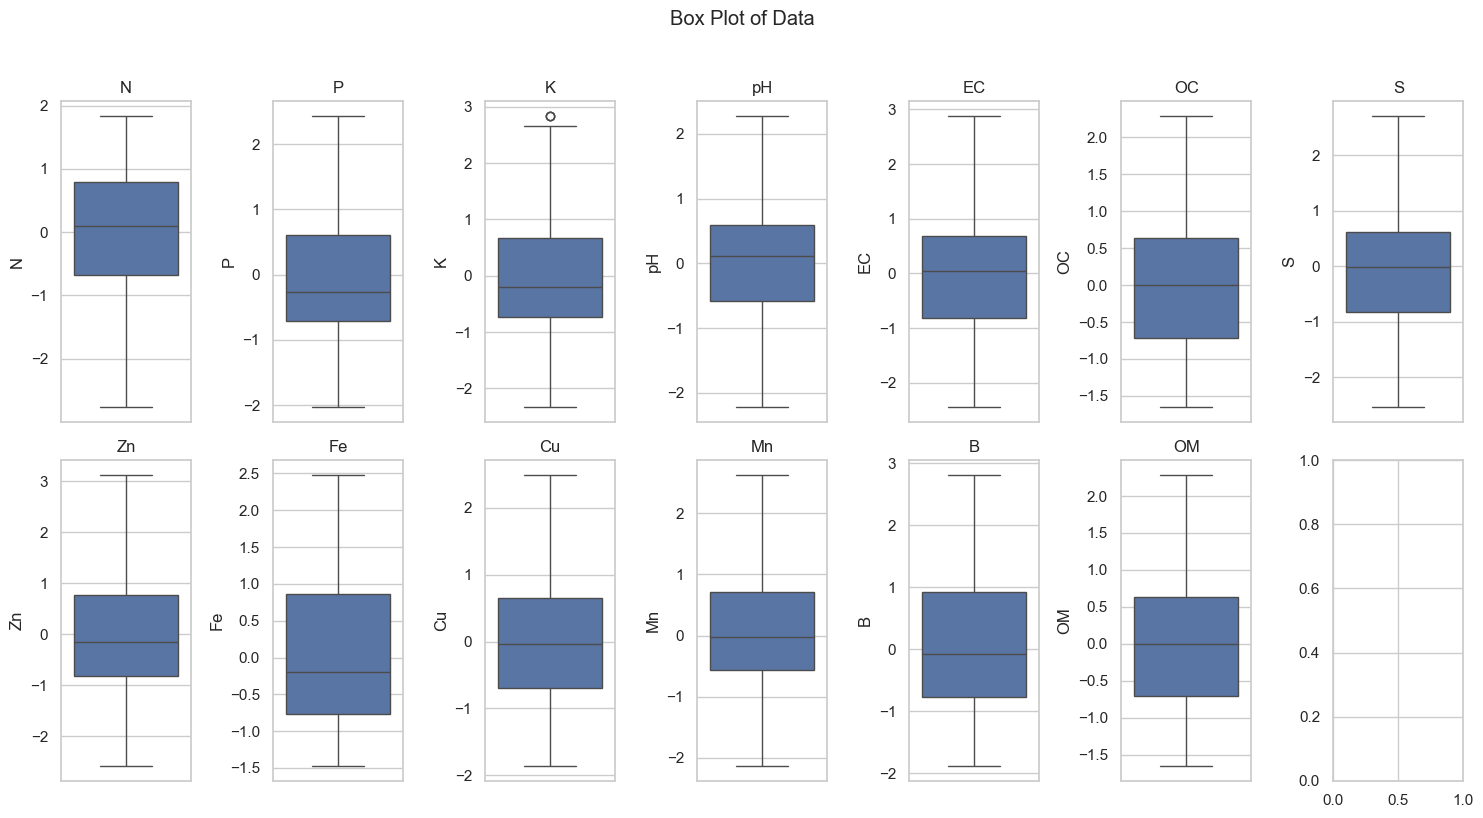

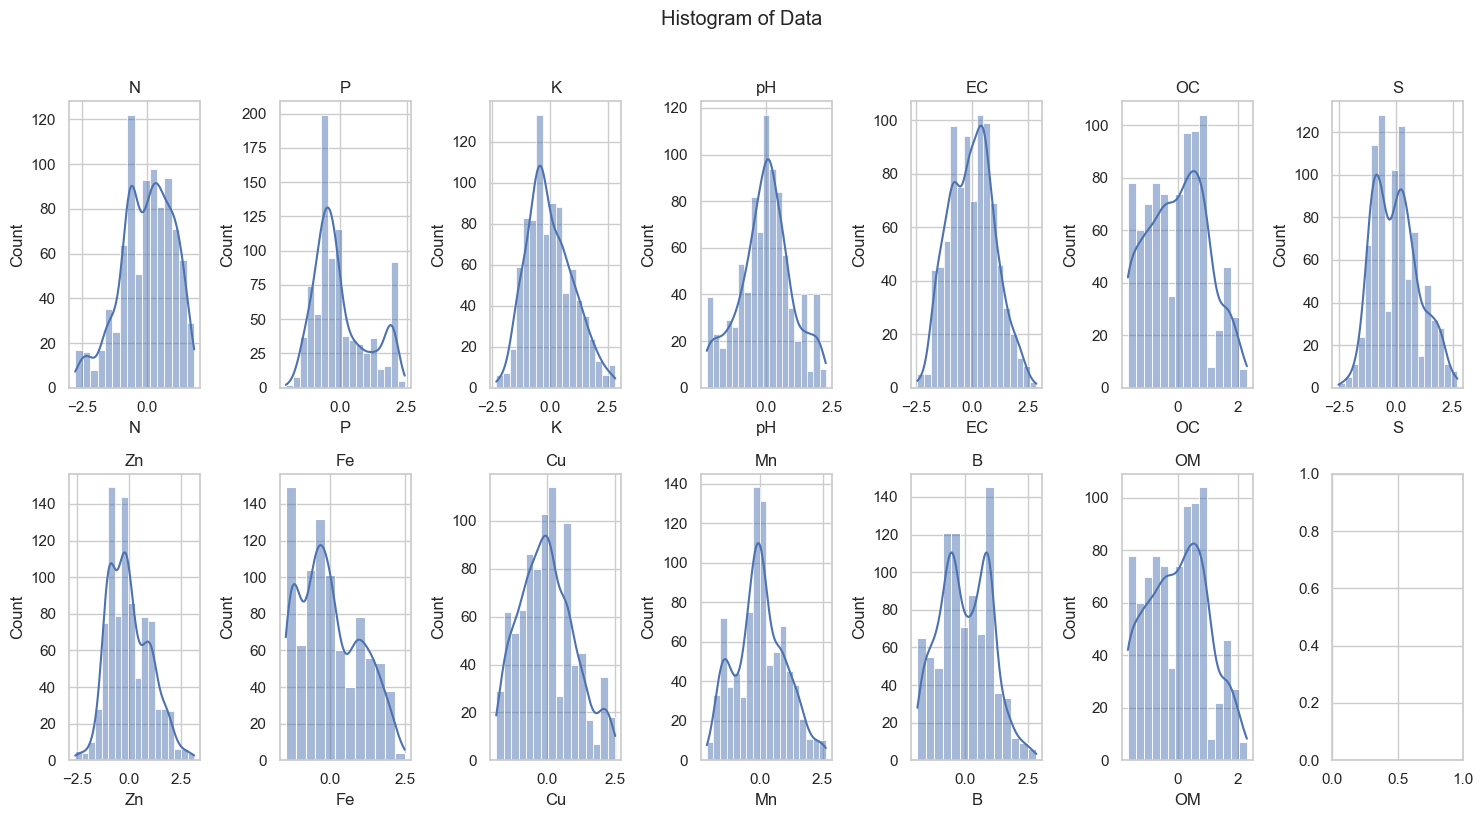

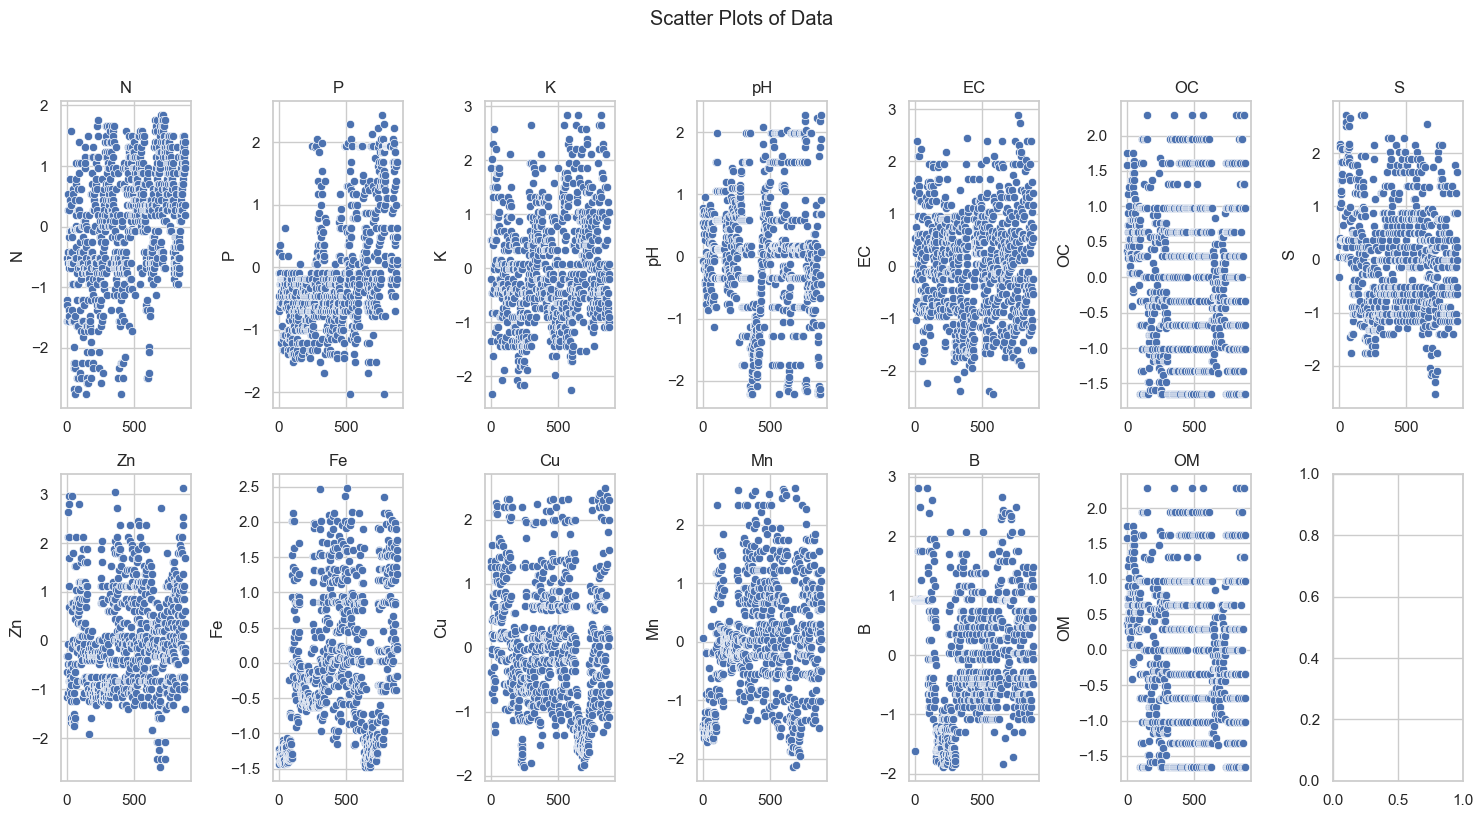

In [6]:
for current_type in PlotType:
    plot(X, plot_type=current_type)

In [7]:
# save processed data
processed_data = pd.concat([X, Y], axis=1)
processed_data.to_csv('../data/processed_dataset1.csv', index=False)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(702, 13) (176, 13) (702,) (176,)


# KNN

In [10]:
for strategy in strategies:
    knn = KNN(k=3, strategy=strategy)
    knn.fit(X_train, Y_train)
    print(f'Accuracy for {strategy} strategy: {knn.score(X_test, Y_test, metric="accuracy")}')

Accuracy for euclidean strategy: 0.8011363636363636
Accuracy for manhattan strategy: 0.7840909090909091
Accuracy for minkowski strategy: 0.8011363636363636
Accuracy for cosine strategy: 0.7840909090909091
Accuracy for hamming strategy: 0.6704545454545454


# Decision tree

In [ ]:
tree = DecisionTree()
tree.fit(X_train, Y_train)
print(f'Accuracy for decision tree: {tree.score(X_test, Y_test, metric="accuracy")}')

# Random forest

In [ ]:
random_forest = RandomForest(n_trees=2)
random_forest.fit(X, Y)
print(f'Accuracy for random forest: {random_forest.score(X_test, Y_test, metric="accuracy")}')

# Search for best parameters using grid search

In [ ]:
averages = list(get_args(Average))
averages.remove('binary')
averages

<h4>Knn</h4>

In [ ]:
parameters = {'k': [1, 3, 5, 7], 'strategy': strategies.keys()}
results, best_results = grid_search_cv(KNN, X_train, Y_train, parameters, metric='f1-score', average='macro', cv=5)

pprint(best_results)
results

<h4>Decision tree</h4>

In [ ]:
parameters = {'max_depth': [10, 50, 100]}
results, best_results = grid_search_cv(DecisionTree, X_train, Y_train, parameters, metric='f1-score', average='macro', cv=5)

pprint(best_results)
results

<h4>Random forest</h4>

In [ ]:
parameters = {'n_trees': [2, 5, 10], 'max_depth': [10, 50, 100]}
results, best_results = grid_search_cv(RandomForest, X_train, Y_train, parameters, metric='f1-score', average='macro', cv=5)

pprint(best_results)
results

# Evaluate the final models

In [ ]:
models = [KNN(k=3, strategy=strategies['manhattan']), DecisionTree(max_depth=50), RandomForest(n_trees=5, max_depth=50)]
models

In [ ]:
results_by_class = evaluate_by_class(X_train, Y_train, X_test, Y_test, models)
pprint(results_by_class)

In [ ]:
results = evaluate(X_train, Y_train, X_test, Y_test, models, averages=averages, metrics=get_args(Metric))
results

In [ ]:
heatmaps(x_train=X_train, y_train=Y_train, x_test=X_test, y_test=Y_test, models=models)